In [67]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())



In [63]:
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()
        
    def get_data(self):
        """method that downloads data and stores in a DataFrame
           uncomment the code below wich should be the final two lines 
           of your method"""
        df = yfinance.download(self.symbol, start=self.start, end=self.end)
        self.calc_returns(df)
        return df

    def calc_returns(self, df):
        """method that adds change and return columns to data"""
        df['Difference'] = df['Close'].diff()
        df['Instantaneous'] = np.log(df['Close']).diff().round(4)
        
        
    def plot_return_dist(self):
        """method that plots instantaneous returns as histogram"""
        self.data['Instantaneous'].hist()
        plt.xlabel("Returns")
        plt.ylabel("Frequency")
        plt.show()
        
    def plot_performance(self):
        """method that plots stock object performance as percent """
        normalized = (self.data['Close'] / self.data['Close'].iloc[0]) * 100
        normalized.plot()
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.show()
        

        

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-14  215.779999  230.490005  213.660004  229.710007  229.608139   
2023-02-15  225.490005  228.550003  221.059998  227.639999  227.539047   
2023-02-16  221.330002  225.500000  219.270004  220.020004  219.922424   
2023-02-17  216.309998  217.399994  209.750000  213.880005  213.785141   
2023-02-21  210.000000  214.940002  206.179993  206.550003  206.458405   
...                ...         ...         ...         ...         ...   
2024-02-07  683.190002  702.200012  676.000000  700.989990  700.989990   
2024-02-08  700.739990  707.940002  694.549988  696.409973  696.409973   
2024-02-09  705.330017  721.849976  702.119995  721.330017  721.330017   
2024-02-12  726.000000  746.109985  712.500000  722.479980  722.479980   
2024-02-13  704.000000  734.500000  696.200012  721.280029  721.280029   

              Volume  Difference  Ins

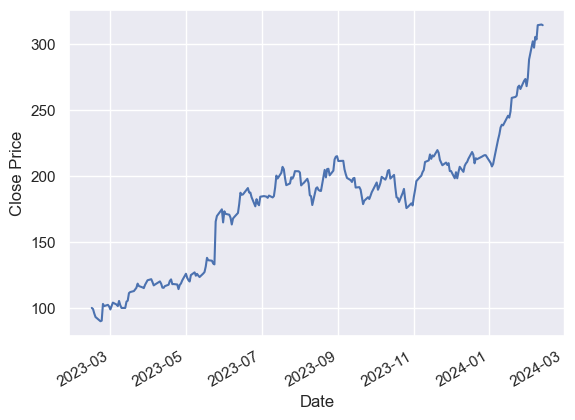

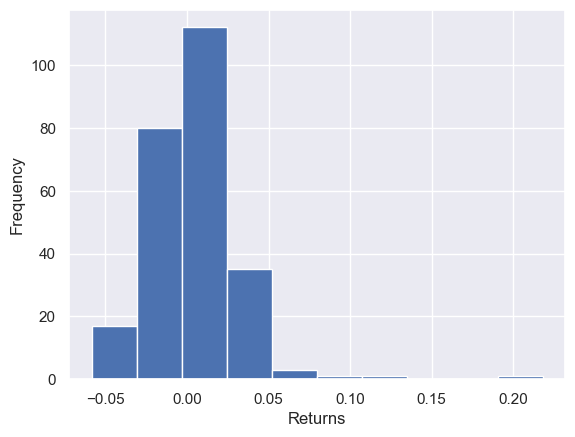

In [66]:
def main():
    # uncomment (remove pass) code below to test
    test = Stock('NVDA') # optionally test custom data range
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()
    

if __name__ == '__main__':
    main() 